In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly_express as px


In [2]:
df_weather=pd.read_csv("/content/drive/MyDrive/Datasets/weather_features.csv",index_col='dt_iso')
df_weather.sort_index(inplace=True)

df1=df_weather
print(df1.shape)

(178396, 16)


In [3]:
df_energy=pd.read_csv("/content/drive/MyDrive/Datasets/energy_dataset.csv",index_col='time')
df_energy.sort_index(inplace=True)
df2=df_energy['total load actual']
print(df2.shape)

(35064,)


In [4]:
dff=df1.merge(df2,left_index=True, right_index=True)

In [5]:
dff

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,total load actual
2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
2015-01-01 00:00:00+01:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
2015-01-01 00:00:00+01:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01,25385.0
2015-01-01 00:00:00+01:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
2015-01-01 00:00:00+01:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00+01:00,Valencia,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n,24455.0
2018-12-31 23:00:00+01:00,Barcelona,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n,24455.0
2018-12-31 23:00:00+01:00,Madrid,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n,24455.0
2018-12-31 23:00:00+01:00,Bilbao,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n,24455.0


In [6]:
dff.reset_index(inplace=True)

In [7]:
dff=dff[:10000]
dff.head()

,index,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,total load actual
0,2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
1,2015-01-01 00:00:00+01:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
2,2015-01-01 00:00:00+01:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01,25385.0
3,2015-01-01 00:00:00+01:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0
4,2015-01-01 00:00:00+01:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n,25385.0


In [8]:
dff.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,total load actual
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9910.000000
mean,281.584641,281.448073,281.760131,1.957797e+03,73.291700,2.968800,194.106100,0.236010,0.000974,0.084538,33.559000,730.005600,29393.049041
std,5.196572,5.149138,5.402624,2.519846e+04,19.708187,3.036997,110.870277,0.823518,0.008086,0.936503,37.328237,127.121089,5010.321732
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.000000,18934.000000
25%,278.273180,278.150000,278.331000,1.007000e+03,62.000000,1.000000,73.000000,0.000000,0.000000,0.000000,0.000000,800.000000,24897.000000
50%,281.862250,281.750000,282.038250,1.019000e+03,77.000000,2.000000,222.000000,0.000000,0.000000,0.000000,14.000000,800.000000,29638.000000
75%,285.150000,285.015820,285.272125,1.026000e+03,89.000000,4.000000,292.000000,0.000000,0.000000,0.000000,76.000000,801.000000,33609.000000
max,299.150000,299.150000,303.150000,1.008371e+06,100.000000,64.000000,360.000000,12.000000,0.100000,21.500000,92.000000,804.000000,40232.000000


In [9]:
dff['load_bin']=pd.cut(x=dff['total load actual'], bins=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


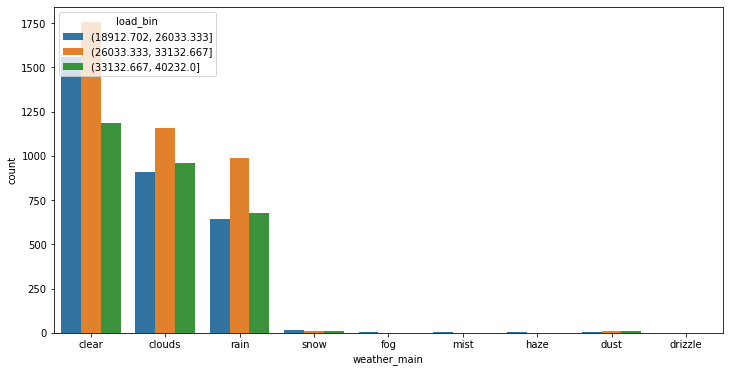

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=dff, x='weather_main',hue='load_bin')

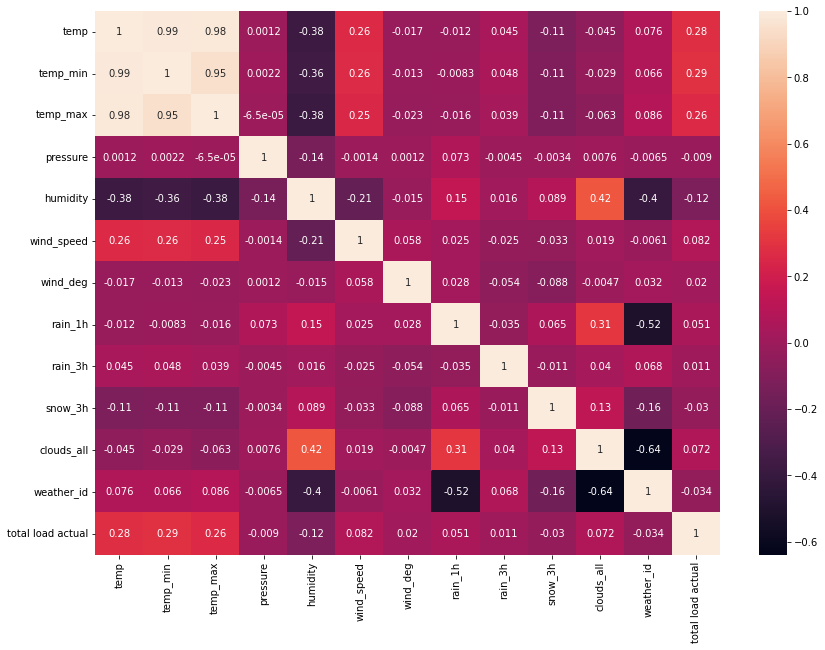

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(dff.corr(), annot=True)

1. temp_min, temp, temp_max (these are highly corellated to each other)



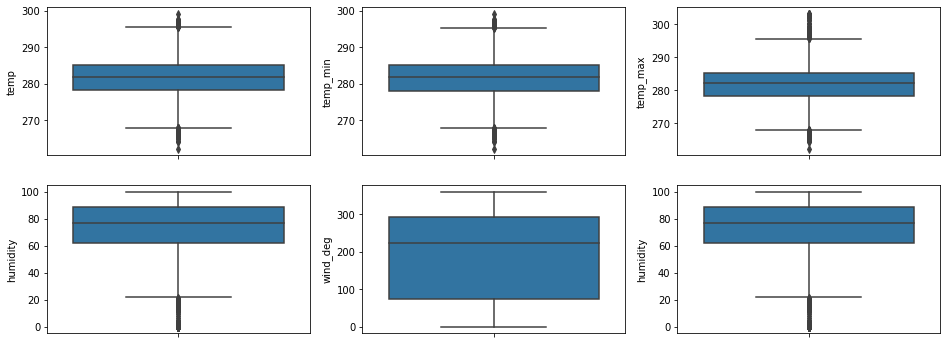

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
sns.boxplot(data=dff,y='temp')
plt.subplot(2,3,2)
sns.boxplot(data=dff,y='temp_min')
plt.subplot(2,3,3)
sns.boxplot(data=dff,y='temp_max')
plt.subplot(2,3,4)
sns.boxplot(data=dff,y='humidity')
plt.subplot(2,3,5)
sns.boxplot(data=dff,y='wind_deg')
plt.subplot(2,3,6)
sns.boxplot(data=dff,y='humidity')

In [30]:
log_transformed=pd.concat([np.log10(dff['wind_speed']+1),np.log10(dff['clouds_all']+1)], axis=1)
other_features=pd.concat([dff['temp'], dff['humidity'], dff['wind_deg']], axis=1)

df=pd.concat([log_transformed,other_features], axis=1)

In [31]:
df.head()

,wind_speed,clouds_all,temp,humidity,wind_deg
0,0.30103,0.0,270.475000,77,62
1,0.30103,0.0,267.325000,63,309
2,0.00000,0.0,269.657312,97,226
3,0.90309,0.0,281.625000,100,58
4,0.30103,0.0,273.375000,75,21


In [33]:
def outlier_limits(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return upper_bound,lower_bound

for column in df.columns:
    UL, LL = outlier_limits(df[column])
    df[column]= np.where((df[column]>UL) | (df[column]<LL), df[column].median(), df[column])

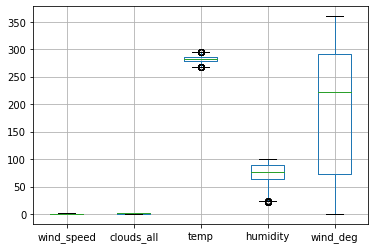

In [34]:
df.boxplot()

In [52]:
df.isnull().sum()

wind_speed    0
clouds_all    0
temp          0
humidity      0
wind_deg      0
dtype: int64

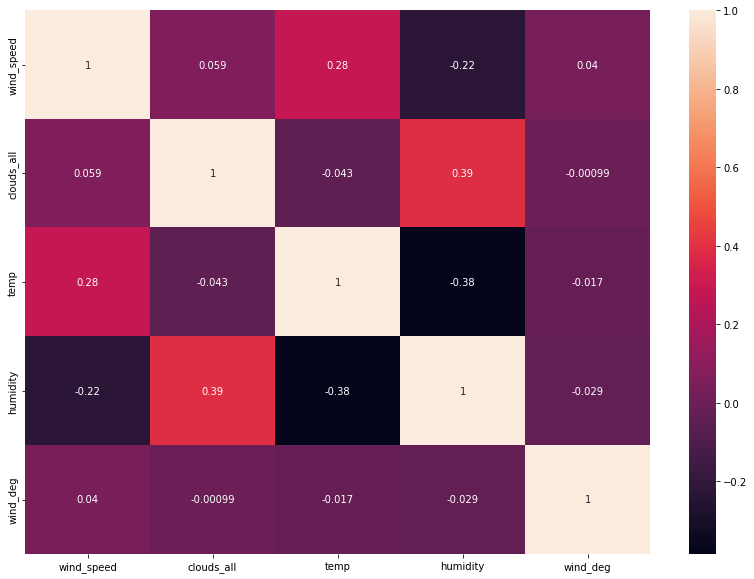

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

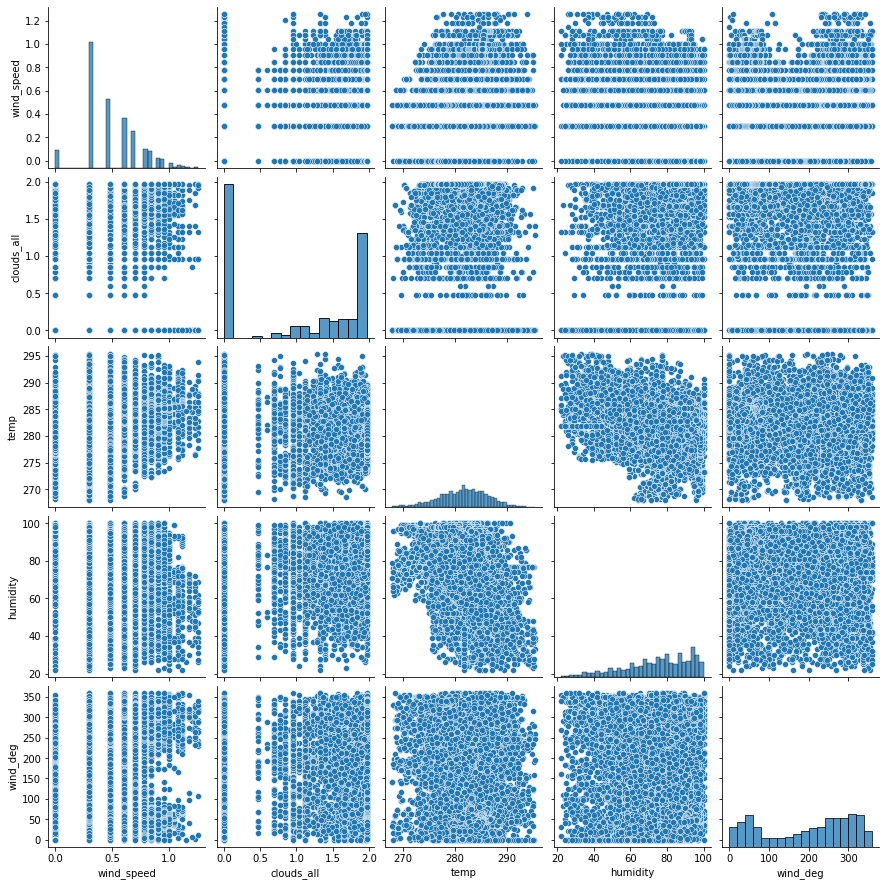

In [49]:
sns.pairplot(df)

In [38]:
city_name=pd.get_dummies(dff['city_name'], drop_first=True)
city_name

,Bilbao,Madrid,Seville,Valencia
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
9995,0,1,0,0
9996,0,0,0,1
9997,0,0,1,0
9998,0,1,0,0


In [43]:
weather_main=pd.get_dummies(dff['weather_main'], drop_first=True)
weather_main

,clouds,drizzle,dust,fog,haze,mist,rain,snow
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1,0
9996,0,0,0,0,0,0,1,0
9997,0,0,0,0,0,0,1,0
9998,0,0,0,0,0,0,1,0


In [44]:
weather_description=pd.get_dummies(dff['weather_description'], drop_first=True)
weather_description

,drizzle,dust,few clouds,fog,haze,heavy intensity rain,heavy snow,light rain,light snow,mist,moderate rain,overcast clouds,scattered clouds,sky is clear,very heavy rain
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
final_ds=pd.concat([  weather_description,  weather_main, city_name, df ,dff['total load actual'] ], axis=1 )
final_ds=final_ds.dropna()
final_ds.head()

,drizzle,dust,few clouds,fog,haze,heavy intensity rain,heavy snow,light rain,light snow,mist,moderate rain,overcast clouds,scattered clouds,sky is clear,very heavy rain,clouds,drizzle,dust,fog,haze,mist,rain,snow,Bilbao,Madrid,Seville,Valencia,wind_speed,clouds_all,temp,humidity,wind_deg,total load actual
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.0,270.475000,77.0,62.0,25385.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.30103,0.0,281.862250,63.0,309.0,25385.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00000,0.0,269.657312,97.0,226.0,25385.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.90309,0.0,281.625000,100.0,58.0,25385.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.30103,0.0,273.375000,75.0,21.0,25385.0


In [56]:
X=final_ds.drop(['total load actual'],axis=1)
y=final_ds['total load actual']


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)


RandomForestRegressor()

In [117]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def eval(model):



  pred=model.predict(X_test)
  mape=mean_absolute_percentage_error(y_test, pred)
  mae=mean_absolute_error(y_test, pred)
  mse=mean_squared_error(y_test, pred)
  rmse=np.sqrt(mse)


  print('MAPE:', mape)
  print('MAE:', mae)
  #print('MSE:', mse)
  print('RMSE:', rmse)

  



In [92]:
eval(RF)

MAPE: 0.2046863448208383
MAE: 6565.481957053963


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


(0.2046863448208383, 6565.481957053963)

In [65]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [66]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

In [68]:
selected_feat= X_train.columns[(sel.get_support())]
selected_feat

Index(['wind_speed', 'clouds_all', 'temp', 'humidity', 'wind_deg'], dtype='object')

In [71]:
final_features=pd.concat([ final_ds['wind_speed'],
                          final_ds['clouds_all'],
                          final_ds['temp'],
                          final_ds['humidity'],
                          final_ds['wind_deg'],
], axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(final_features)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [93]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf")
svr.fit(X_train, y_train)

SVR()

In [82]:
eval(svr)

MAPE: 0.15692809082661033
MAE: 4326.6323482683265


(0.15692809082661033, 4326.6323482683265)

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
GB= GradientBoostingRegressor()
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [84]:
eval(GB)

MAPE: 0.13941301713347715
MAE: 3883.496167548213


(0.13941301713347715, 3883.496167548213)

In [90]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(90)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=90)

In [91]:
eval(knn)

MAPE: 0.14358473272795053
MAE: 3985.9059760062787


(0.14358473272795053, 3985.9059760062787)

In [94]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [99]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

[16:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [100]:
eval(xg_reg)

MAPE: 0.13956557824217025
MAE: 3889.423309788093


(0.13956557824217025, 3889.423309788093)

In [103]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1,0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

grid_obj_xgb = RandomizedSearchCV(xg_reg,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train,verbose = 1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=15, n_jobs=12,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [1, 2, 3],
                                        'learning_rate': [0.1, 0.1],
                                        'max_depth': [7, 10, 15, 20],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [300, 400, 500, 600],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 0.2, 1],
                                        'reg_lambda': [2, 3, 5]},
                   scoring='neg_mean_absolute_error', verbose=5)

In [105]:
 grid_obj_xgb.best_estimator_

XGBRegressor(colsample_bytree=0.9, gamma=2, max_depth=20, min_child_weight=10,
             n_estimators=600, objective='reg:squarederror', reg_alpha=1,
             reg_lambda=3)

In [106]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree=0.9, gamma=2, max_depth=20, min_child_weight=10,
             n_estimators=600, objective='reg:squarederror', reg_alpha=1,
             reg_lambda=3)
xg_reg.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.9, gamma=2, max_depth=20, min_child_weight=10,
             n_estimators=600, objective='reg:squarederror', reg_alpha=1,
             reg_lambda=3)

In [118]:
eval(xg_reg)

MAPE: 0.10339154147767764
MAE: 2923.348906762424
RMSE: 3873.3980327927934


In [114]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(xg_reg, files)